# Kevin Alvarez CSC 217 Project

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

Data was gathered from National Survey on Drug Use and Health, 2012 (ICPSR 34933) Downloaded from https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv Loaded in from a csv file. Features 17 different age groups. Younger ages seemed to be surveyed more and therefore broken up. 
* Column (drug)-use includes percentage of n that used said drug in the past 12 months. 
* Column (drug)-frequency includes median number of how times a user in the age group used said drug in the past 12 months.

In [2]:
data = pd.read_csv('data.csv')
data.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### Cleaning the data a bit
Replacing '-' values to 0.
Creating two dataframes, one for just frequency and one for use.

In [3]:
for index, row in data.iterrows():
    for col in data.columns:
        if(isinstance(row[col],str) and row[col] == '-'):
           data.at[index,col] = 0.0

frequency_columns = []
use_columns = []

for col in data.columns:
    if('frequency' in col):
        frequency_columns.append(col);
for col in data.columns:
    if('use' in col):
        use_columns.append(col);
        
frequency_data = data.drop(use_columns,axis=1)
use_data = data.drop(frequency_columns,axis=1)

## Visualizing Different Drug Frequencies

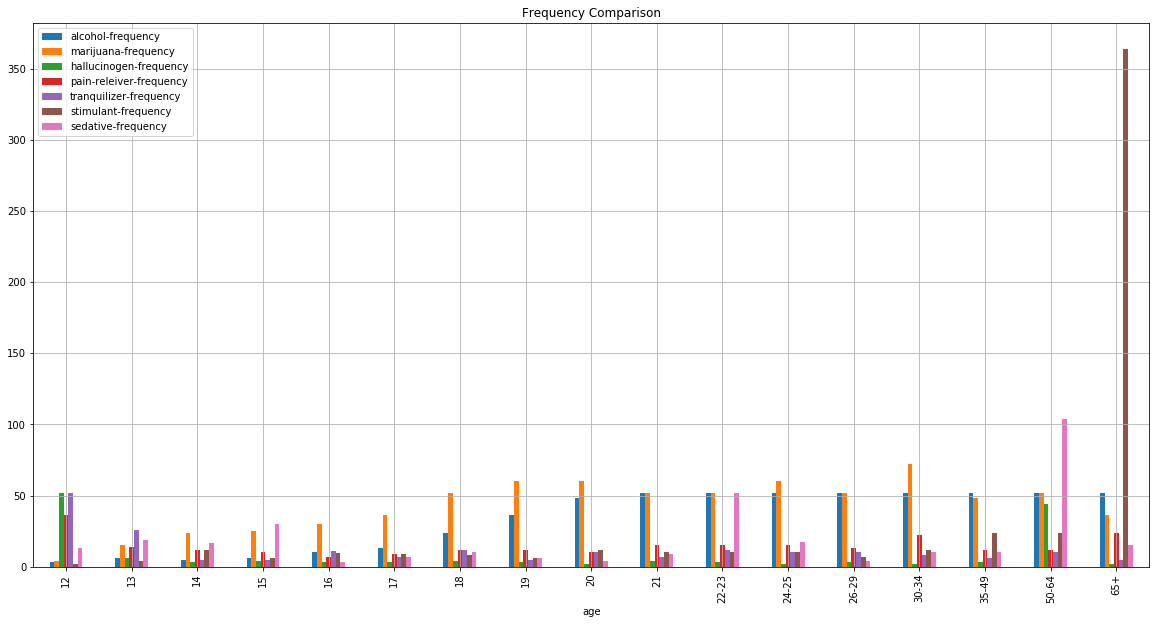

In [4]:
data.plot(x='age',y = frequency_columns ,grid = True, kind='bar',title='Frequency Comparison',figsize=(20,10))

Just from a simple visualization we see that marijuana is used the most in most age groups, with a big outlier of ages 65+ using stimulants around 360 times in a year. This might show that those using stimulants are prescribed it and therefore use it everyday.

# Visualizing Different Drug Use

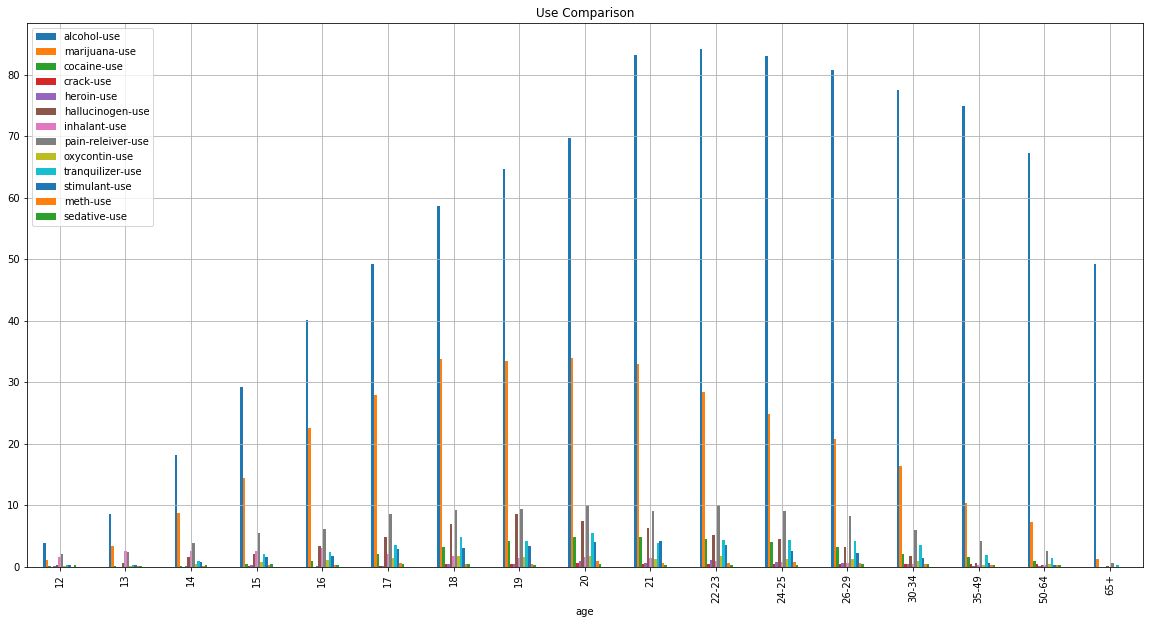

In [5]:
data.plot(x='age',y = use_columns ,grid = True, kind='bar',title='Use Comparison',figsize=(20,10))

## Chi Square Test for Alchohol vs Drug Frequencies

Here we set up two lists that holds all our frequency values for alcohol and marijuana.
We then see where our rejection region would be given using the degrees of freedom calculated from those two lists.
* Null Hypothesis: is that the these two frequencies can come from the same distribution
* Alternate Hypothesis is that they come from another distribution

Rejection Region: Greater than 18.31


Text(0.5, 0.92, 'Chi-Square Distribution with 16 Degrees of Freedom')

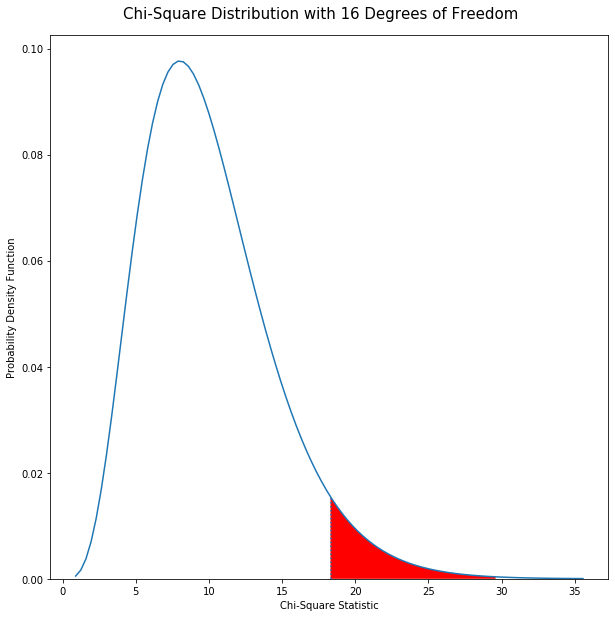

In [6]:
alcohol_frequencies = []
marijuana_frequencies = []
for index, row in data.iterrows():
    alcohol_frequencies.append(data.at[index,'alcohol-frequency'])
    marijuana_frequencies.append(data.at[index,'marijuana-frequency'])
    
degrees_freedom = len(alcohol_frequencies) - 1 # (Length of possible outcomes - 1) * (2 distributions - 1)
dist = stats.chi2(df=degrees_freedom)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with ' + str(degrees_freedom) + ' Degrees of Freedom', fontsize=15, y=0.92)

In [7]:
stats.chi2_contingency([alcohol_frequencies, marijuana_frequencies])

(53.76907381287019,
 5.6557322379107144e-06,
 16,
 array([[ 3.06013878,  9.18041635, 12.67771781, 13.55204318, 17.48650732,
         21.42097147, 33.22436392, 41.96761758, 47.21356978, 45.46491904,
         45.46491904, 48.96222051, 45.46491904, 54.20817271, 43.71626831,
         45.46491904, 38.47031611],
        [ 3.93986122, 11.81958365, 16.32228219, 17.44795682, 22.51349268,
         27.57902853, 42.77563608, 54.03238242, 60.78643022, 58.53508096,
         58.53508096, 63.03777949, 58.53508096, 69.79182729, 56.28373169,
         58.53508096, 49.52968389]]))

We can reject the null hypothesis. The value we got from Chi2 Contigency is 53.769 and our rejection region is anything above 18.31